In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.RNN import LSTM
from genrecog.tools.trainer import RNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model = LSTM(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=True
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

LSTM(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
trainer = RNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 30.75
Training loss 1.8838
Validation accuracy 10.50
Validation loss 2.2974
============================== EPOCH 2 =================================
Training accuracy 44.81
Training loss 1.5502
Validation accuracy 17.25
Validation loss 2.2489
============================== EPOCH 3 =================================
Training accuracy 48.19
Training loss 1.4431
Validation accuracy 30.50
Validation loss 2.1818
============================== EPOCH 4 =================================
Training accuracy 51.94
Training loss 1.3488
Validation accuracy 44.50
Validation loss 2.0655
============================== EPOCH 5 =================================
Training accuracy 53.44
Training loss 1.3058
Validation accuracy 48.50
Validation loss 1.9275
============================== EPOCH 6 =================================
Training accuracy 56.56
Training loss 1.2098
Validation accuracy 56.50
Validation loss 1.777

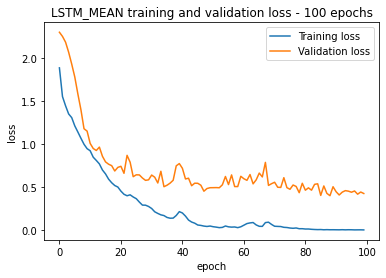

In [8]:
trainer.plot_loss("LSTM_MEAN training and validation loss - 100 epochs")

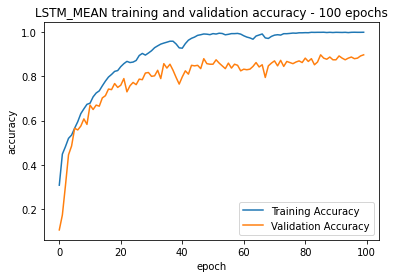

In [9]:
trainer.plot_accuracies("LSTM_MEAN training and validation accuracy - 100 epochs")

In [10]:
trainer.eval(test_dataloader)

(tensor([7, 2, 0, 2, 7, 3, 4, 5, 7, 4, 7, 8, 7, 0, 6, 2, 2, 0, 0, 9, 8, 4, 9, 4,
         3, 8, 8, 4, 1, 0, 1, 0, 2, 6, 1, 0, 9, 2, 3, 1, 4, 9, 6, 7, 6, 8, 7, 6,
         4, 8, 1, 8, 5, 6, 9, 2, 3, 2, 3, 9, 9, 0, 2, 6, 6, 0, 5, 4, 7, 9, 6, 6,
         2, 4, 1, 8, 1, 7, 6, 1, 8, 5, 5, 5, 3, 2, 6, 2, 4, 9, 7, 4, 3, 5, 0, 9,
         9, 8, 4, 5, 9, 0, 9, 6, 9, 3, 0, 9, 7, 8, 6, 0, 6, 5, 3, 3, 4, 8, 8, 6,
         0, 2, 0, 5, 9, 4, 8, 3, 8, 3, 5, 4, 0, 5, 7, 7, 0, 9, 3, 4, 0, 7, 8, 1,
         0, 6, 0, 1, 9, 4, 4, 1, 2, 2, 2, 0, 2, 8, 0, 4, 3, 5, 0, 6, 3, 2, 8, 8,
         8, 4, 2, 3, 2, 6, 0, 3, 5, 1, 3, 7, 7, 2, 9, 9, 3, 1, 2, 0, 0, 4, 0, 7,
         1, 2, 7, 7, 2, 4, 5, 7, 9, 7, 9, 3, 1, 7, 8, 9, 0, 0, 9, 0, 7, 8, 6, 4,
         3, 6, 4, 4, 9, 9, 9, 7, 5, 3, 5, 2, 5, 1, 3, 7, 8, 5, 5, 3, 2, 4, 6, 6,
         8, 0, 9, 0, 0, 8, 2, 4, 2, 1, 4, 9, 2, 9, 5, 4, 7, 0, 6, 4, 6, 9, 6, 9,
         4, 3, 9, 4, 1, 8, 7, 8, 3, 2, 6, 2, 3, 5, 2, 0, 1, 6, 6, 8, 0, 9, 8, 0,
         2, 3, 7, 8, 4, 9, 9

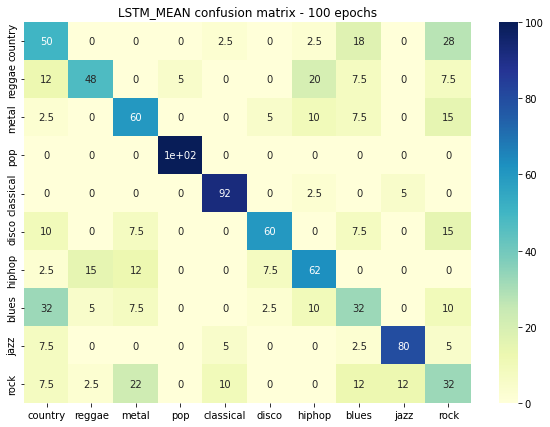

In [11]:
trainer.plot_confusion_matrix(test_dataloader, 'LSTM_MEAN confusion matrix - 100 epochs')

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.40      0.50      0.44        40
      reggae       0.68      0.47      0.56        40
       metal       0.55      0.60      0.57        40
         pop       0.95      1.00      0.98        40
   classical       0.84      0.93      0.88        40
       disco       0.80      0.60      0.69        40
      hiphop       0.58      0.62      0.60        40
       blues       0.37      0.33      0.35        40
        jazz       0.82      0.80      0.81        40
        rock       0.29      0.33      0.31        40

    accuracy                           0.62       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.63      0.62      0.62       400



In [13]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model_2 = LSTM(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=True
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

LSTM(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
trainer_2 = RNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=70)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 32.37
Training loss 1.8913
Validation accuracy 16.25
Validation loss 2.2975
============================== EPOCH 2 =================================
Training accuracy 44.50
Training loss 1.5330
Validation accuracy 15.75
Validation loss 2.2494
============================== EPOCH 3 =================================
Training accuracy 48.50
Training loss 1.4274
Validation accuracy 31.50
Validation loss 2.1742
============================== EPOCH 4 =================================
Training accuracy 52.22
Training loss 1.3197
Validation accuracy 31.75
Validation loss 2.1200
============================== EPOCH 5 =================================
Training accuracy 55.87
Training loss 1.2438
Validation accuracy 45.75
Validation loss 2.0083
============================== EPOCH 6 =================================
Training accuracy 58.75
Training loss 1.1897
Validation accuracy 49.25
Validation loss 1.842

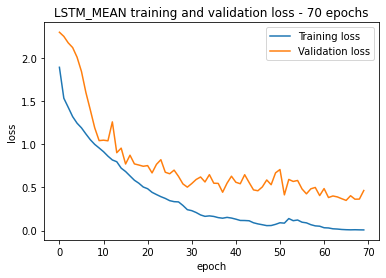

In [15]:
trainer_2.plot_loss("LSTM_MEAN training and validation loss - 70 epochs")

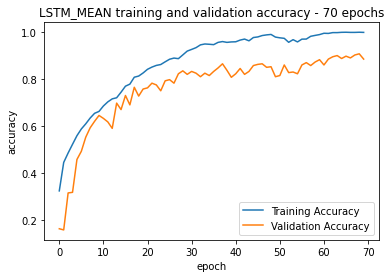

In [16]:
trainer_2.plot_accuracies("LSTM_MEAN training and validation accuracy - 70 epochs")

In [17]:
trainer_2.eval(test_dataloader)

(tensor([4, 2, 5, 3, 7, 3, 9, 8, 6, 8, 4, 9, 8, 9, 6, 2, 2, 6, 9, 7, 7, 6, 8, 9,
         9, 3, 0, 8, 2, 3, 4, 0, 6, 9, 7, 6, 0, 9, 8, 7, 6, 3, 4, 6, 9, 9, 3, 7,
         4, 9, 9, 3, 2, 6, 7, 5, 2, 2, 3, 4, 3, 5, 5, 5, 7, 4, 9, 8, 3, 9, 3, 5,
         6, 7, 2, 6, 6, 3, 0, 7, 5, 2, 9, 7, 0, 8, 5, 4, 5, 6, 9, 1, 1, 9, 3, 5,
         6, 8, 7, 4, 8, 9, 0, 7, 9, 3, 0, 9, 9, 4, 7, 3, 6, 4, 4, 4, 6, 8, 0, 1,
         8, 2, 1, 5, 6, 6, 2, 9, 3, 5, 3, 7, 7, 0, 0, 0, 8, 8, 0, 6, 2, 8, 7, 0,
         0, 3, 4, 0, 9, 7, 5, 6, 3, 3, 0, 7, 8, 4, 0, 2, 4, 0, 9, 3, 0, 7, 8, 2,
         0, 7, 3, 7, 7, 9, 6, 5, 0, 3, 7, 6, 6, 0, 5, 6, 4, 1, 6, 4, 3, 7, 5, 8,
         6, 0, 0, 4, 6, 3, 6, 8, 0, 5, 4, 1, 1, 3, 7, 6, 0, 6, 7, 8, 8, 4, 0, 9,
         0, 6, 2, 7, 0, 9, 3, 8, 6, 7, 5, 8, 7, 5, 6, 4, 0, 4, 6, 6, 8, 8, 0, 8,
         8, 4, 8, 8, 3, 2, 7, 0, 8, 3, 6, 5, 3, 6, 5, 4, 3, 9, 1, 4, 8, 9, 0, 7,
         3, 4, 6, 0, 0, 5, 5, 7, 0, 3, 2, 4, 0, 1, 4, 0, 5, 9, 1, 9, 6, 3, 7, 8,
         4, 5, 2, 5, 5, 3, 7

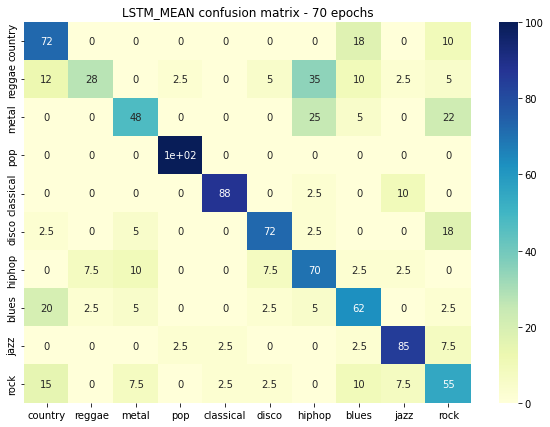

In [18]:
trainer_2.plot_confusion_matrix(test_dataloader, 'LSTM_MEAN confusion matrix - 70 epochs')

In [19]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.59      0.72      0.65        40
      reggae       0.73      0.28      0.40        40
       metal       0.63      0.47      0.54        40
         pop       0.95      1.00      0.98        40
   classical       0.95      0.88      0.91        40
       disco       0.81      0.72      0.76        40
      hiphop       0.50      0.70      0.58        40
       blues       0.57      0.62      0.60        40
        jazz       0.79      0.85      0.82        40
        rock       0.46      0.55      0.50        40

    accuracy                           0.68       400
   macro avg       0.70      0.68      0.67       400
weighted avg       0.70      0.68      0.67       400

